Vaqt: [ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
  7.27272727  7.37373737  7.47474747  7.57575758  7.67676768  7.77777778
  7.87878788  7.97979798  8.08080808  8.18181

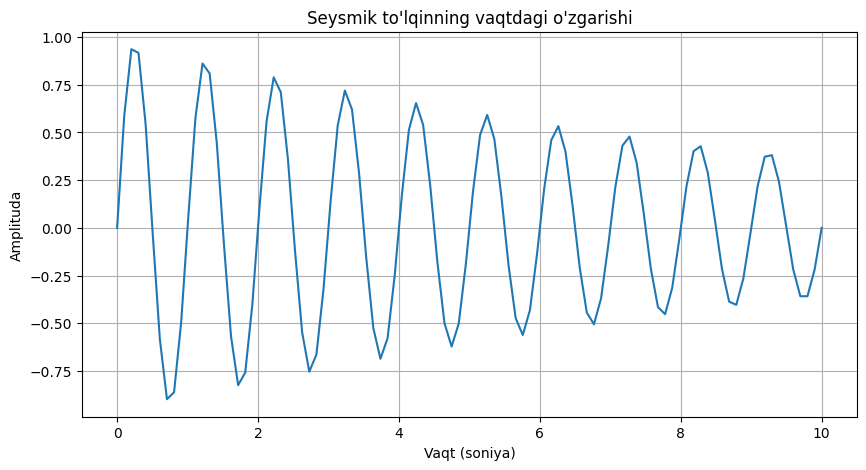

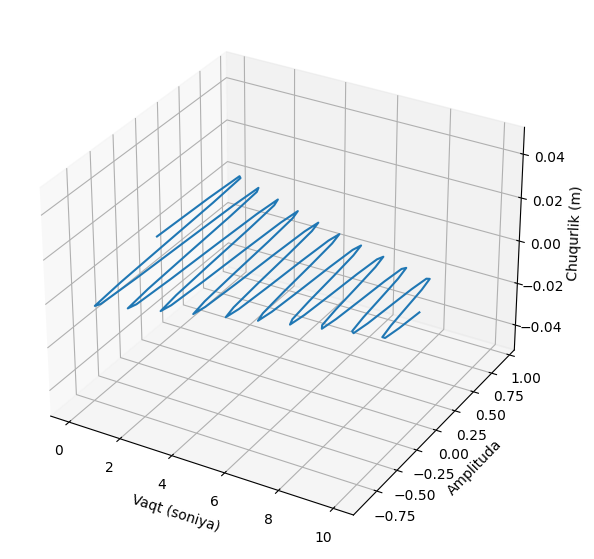

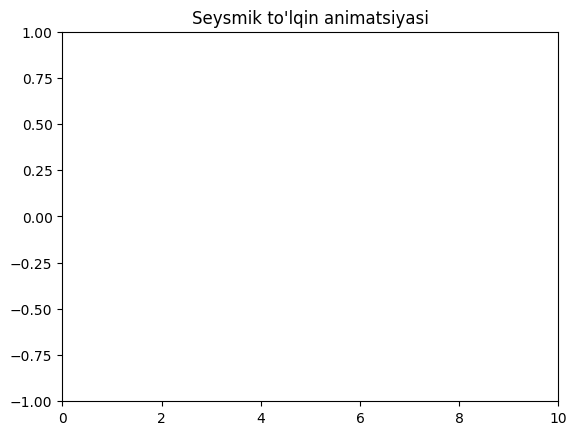

In [17]:
import numpy as np

# Sun'iy seysmik ma'lumotlar yaratamiz
vaqt = np.linspace(0, 10, 100)  # vaqtlarda 100 nuqta (0 dan 10 sekundgacha)
amplituda = np.sin(2 * np.pi * vaqt) * np.exp(-0.1 * vaqt)  # O'tish vaqti va amplituda

# Ma'lumotlarni ko'rsatish uchun
print("Vaqt:", vaqt)
print("Amplituda:", amplituda)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 2D grafik - seysmik to'lqinning vaqtdagi o'zgarishi
plt.figure(figsize=(10, 5))
plt.plot(vaqt, amplituda)
plt.xlabel("Vaqt (soniya)")
plt.ylabel("Amplituda")
plt.title("Seysmik to'lqinning vaqtdagi o'zgarishi")
plt.grid(True)
plt.show()

# 3D grafik
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(vaqt, amplituda, zs=0, zdir='z', label='Seysmik to\'lqin')
ax.set_xlabel('Vaqt (soniya)')
ax.set_ylabel('Amplituda')
ax.set_zlabel('Chuqurlik (m)')
plt.show()

from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.set_xlim(0, 10)
ax.set_ylim(-1, 1)
ax.set_title("Seysmik to'lqin animatsiyasi")

def init():
    line.set_data([], [])
    return line,

def update(frame):
    x = vaqt[:frame]
    y = amplituda[:frame]
    line.set_data(x, y)
    return line,

ani = FuncAnimation(fig, update, frames=len(vaqt), init_func=init, blit=True)
plt.show()

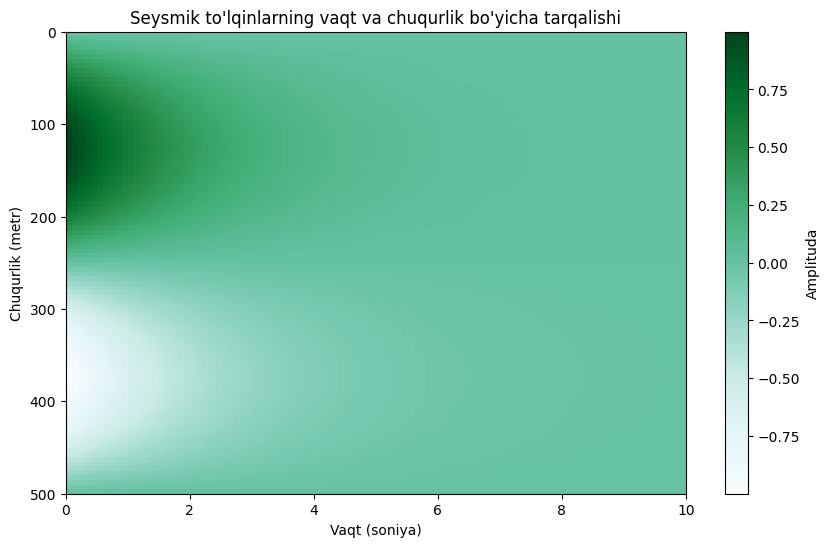

In [13]:
import numpy as np

# Sun'iy seysmik to'lqinlar va qatlamlar uchun ma'lumotlar
vaqt = np.linspace(0, 10, 100)  # Vaqt o'qi (0 dan 10 sekundgacha)
chuqurlik = np.linspace(0, 500, 100)  # Chuqurlik o'qi (0 dan 500 m gacha)

# Har xil qatlamlarda seysmik to'lqinlarning kuchi o'zgaradi
amplituda = np.exp(-0.01 * chuqurlik) * np.sin(2 * np.pi * vaqt[:, np.newaxis] * 0.1)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.imshow(amplituda, extent=[0, 10, 500, 0], aspect='auto', cmap='BuGn')
plt.colorbar(label='Amplituda')
plt.xlabel("Vaqt (soniya)")
plt.ylabel("Chuqurlik (metr)")
plt.title("Seysmik to'lqinlarning vaqt va chuqurlik bo'yicha tarqalishi")
plt.show()

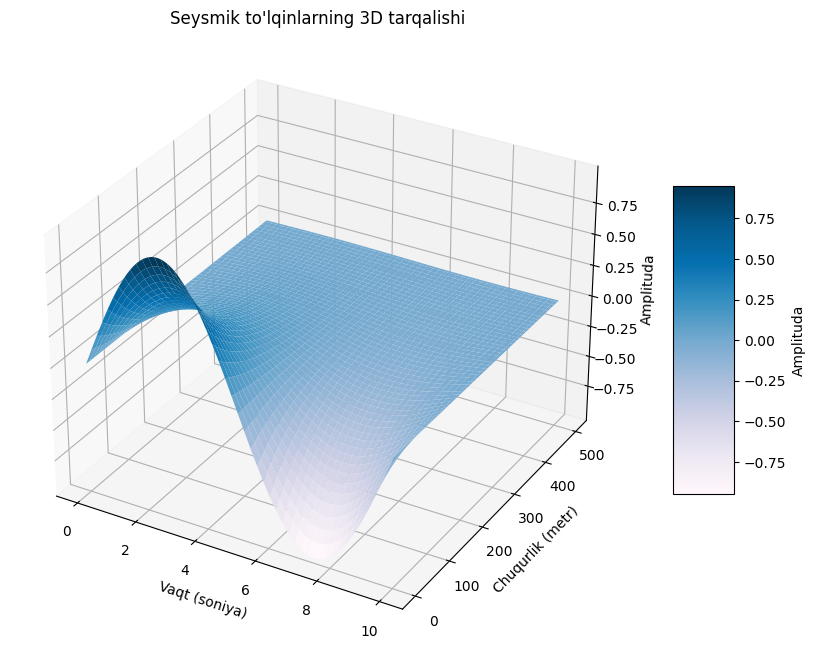

In [14]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# X, Y, va Z o'qlarini aniqlaymiz
X, Y = np.meshgrid(vaqt, chuqurlik)
Z = amplituda.T  # Amplitudani chuqurlik va vaqtga moslashtiramiz

# Grafikni ranglar bilan ifodalaymiz
surf = ax.plot_surface(X, Y, Z, cmap='PuBu', edgecolor='none')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, label='Amplituda')

ax.set_xlabel("Vaqt (soniya)")
ax.set_ylabel("Chuqurlik (metr)")
ax.set_zlabel("Amplituda")
ax.set_title("Seysmik to'lqinlarning 3D tarqalishi")
plt.show()